In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import pickle

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df['blue'] = df['blue'].astype('category')
df['dual_sim'] = df['dual_sim'].astype('category')
df['four_g'] = df['four_g'].astype('category')
df['three_g'] = df['three_g'].astype('category')
df['touch_screen'] = df['touch_screen'].astype('category')
df['wifi'] = df['wifi'].astype('category')
df['price_range'] = df['price_range'].astype('category')

In [6]:
df['fc'] = df['fc'].astype('int8')
df['int_memory'] = df['int_memory'].astype('int8')
df['n_cores'] = df['n_cores'].astype('int8')
df['pc'] = df['pc'].astype('int8')
df['sc_h'] = df['sc_h'].astype('int8')
df['sc_w'] = df['sc_w'].astype('int8')
df['talk_time'] = df['talk_time'].astype('int8')

In [7]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [8]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int8    
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int8    
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int8    
 10  pc             2000 non-null   int8    
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int8    
 15  sc_w           2000 non-null   int8    
 16  talk_time      2000 non-null   int8    
 17  three_g        2000 non-null   ca

In [9]:
df['clock_speed'] = df['clock_speed'].astype('float16')
df['m_dep'] = df['m_dep'].astype('float16')

In [10]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float16 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int8    
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int8    
 7   m_dep          2000 non-null   float16 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int8    
 10  pc             2000 non-null   int8    
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int8    
 15  sc_w           2000 non-null   int8    
 16  talk_time      2000 non-null   int8    
 17  three_g        2000 non-null   ca

In [11]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522461,4.309500,32.046500,0.501953,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.815918,4.341444,18.145715,0.288330,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.099976,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700195,1.000000,16.000000,0.199951,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.199219,7.000000,48.000000,0.799805,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [12]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [13]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [14]:
for cat in cat_features:
    print(f'{cat} - number of unique = {df[cat].nunique()}')

blue - number of unique = 2
dual_sim - number of unique = 2
four_g - number of unique = 2
three_g - number of unique = 2
touch_screen - number of unique = 2
wifi - number of unique = 2
price_range - number of unique = 4


In [15]:
df.query('px_height == 0')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.099609,0,7,1,40,0.099976,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.000000,0,3,1,2,0.600098,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [16]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522461,4.309500,32.046500,0.501953,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.815918,4.341444,18.145715,0.288330,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.099976,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700195,1.000000,16.000000,0.199951,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.199219,7.000000,48.000000,0.799805,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [17]:
df = df.query('px_height >= 20')

In [18]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000
mean,1238.762291,1.522461,4.303599,32.058794,0.502441,140.415611,4.526102,9.920426,653.808920,1253.140902,2121.337557,12.315763,5.787126,11.003548
std,439.620774,0.815918,4.343932,18.106418,0.287842,35.424528,2.283851,6.056383,440.484535,431.854035,1083.025417,4.213874,4.363933,5.462994
min,501.000000,0.500000,0.000000,2.000000,0.099976,80.000000,1.000000,0.000000,20.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,852.000000,0.700195,1.000000,16.000000,0.199951,109.000000,3.000000,5.000000,293.000000,876.000000,1208.000000,9.000000,2.000000,6.000000
50%,1225.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,576.000000,1248.000000,2144.000000,12.000000,5.000000,11.000000
75%,1616.000000,2.199219,7.000000,48.000000,0.799805,170.000000,7.000000,15.000000,952.000000,1633.000000,3057.000000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [19]:
df = df.query('sc_w >= 3')

In [20]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,1228.848991,1.504883,4.267919,32.350731,0.500488,140.091162,4.572721,9.778706,653.225470,1254.062630,2114.595685,12.977035,7.585247,11.027140
std,438.578154,0.806641,4.268810,18.280910,0.289795,35.619303,2.277975,5.945764,447.125012,434.691749,1082.333737,4.007326,3.743407,5.480399
min,501.000000,0.500000,0.000000,2.000000,0.099976,80.000000,1.000000,0.000000,20.000000,501.000000,256.000000,5.000000,3.000000,2.000000
25%,841.000000,0.700195,1.000000,16.000000,0.199951,109.000000,3.000000,5.000000,287.000000,874.000000,1203.000000,10.000000,4.000000,6.000000
50%,1207.000000,1.500000,3.000000,32.000000,0.500000,141.000000,5.000000,10.000000,564.000000,1251.000000,2137.000000,13.000000,7.000000,11.000000
75%,1600.000000,2.199219,7.000000,48.000000,0.799805,170.000000,7.000000,15.000000,954.000000,1636.000000,3031.000000,17.000000,10.000000,16.000000
max,1998.000000,3.000000,18.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [21]:
df.head(15)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.199219,0,1,0,7,0.600098,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500000,1,0,1,53,0.700195,136,3,...,905,1988,2631,17,3,7,1,1,0,2
3,615,1,2.500000,0,0,0,10,0.799805,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
6,1821,0,1.700195,0,4,1,10,0.799805,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.500000,1,0,0,24,0.799805,187,4,...,512,1149,700,16,3,5,1,1,1,0
9,509,1,0.600098,1,2,1,9,0.099976,93,5,...,1137,1224,513,19,10,12,1,0,0,0
11,1520,1,2.199219,0,5,1,33,0.500000,177,8,...,151,1005,3826,14,9,13,1,1,1,3
14,1866,0,0.500000,0,13,1,52,0.700195,185,1,...,356,563,373,14,9,3,1,0,1,0
15,775,0,1.000000,0,3,0,46,0.700195,159,2,...,862,1864,568,17,15,11,1,1,1,0
16,838,0,0.500000,0,1,1,13,0.099976,196,8,...,984,1850,3554,10,9,19,1,0,1,3


In [22]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,1228.848991,1.504883,4.267919,32.350731,0.500488,140.091162,4.572721,9.778706,653.225470,1254.062630,2114.595685,12.977035,7.585247,11.027140
std,438.578154,0.806641,4.268810,18.280910,0.289795,35.619303,2.277975,5.945764,447.125012,434.691749,1082.333737,4.007326,3.743407,5.480399
min,501.000000,0.500000,0.000000,2.000000,0.099976,80.000000,1.000000,0.000000,20.000000,501.000000,256.000000,5.000000,3.000000,2.000000
25%,841.000000,0.700195,1.000000,16.000000,0.199951,109.000000,3.000000,5.000000,287.000000,874.000000,1203.000000,10.000000,4.000000,6.000000
50%,1207.000000,1.500000,3.000000,32.000000,0.500000,141.000000,5.000000,10.000000,564.000000,1251.000000,2137.000000,13.000000,7.000000,11.000000
75%,1600.000000,2.199219,7.000000,48.000000,0.799805,170.000000,7.000000,15.000000,954.000000,1636.000000,3031.000000,17.000000,10.000000,16.000000
max,1998.000000,3.000000,18.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [23]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.199219,0,1,0,7,0.600098,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500000,1,0,1,53,0.700195,136,3,...,905,1988,2631,17,3,7,1,1,0,2
3,615,1,2.500000,0,0,0,10,0.799805,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
6,1821,0,1.700195,0,4,1,10,0.799805,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.500000,1,0,0,24,0.799805,187,4,...,512,1149,700,16,3,5,1,1,1,0
9,509,1,0.600098,1,2,1,9,0.099976,93,5,...,1137,1224,513,19,10,12,1,0,0,0
11,1520,1,2.199219,0,5,1,33,0.500000,177,8,...,151,1005,3826,14,9,13,1,1,1,3
14,1866,0,0.500000,0,13,1,52,0.700195,185,1,...,356,563,373,14,9,3,1,0,1,0
15,775,0,1.000000,0,3,0,46,0.700195,159,2,...,862,1864,568,17,15,11,1,1,1,0
16,838,0,0.500000,0,1,1,13,0.099976,196,8,...,984,1850,3554,10,9,19,1,0,1,3


<Axes: xlabel='price_range', ylabel='fc'>

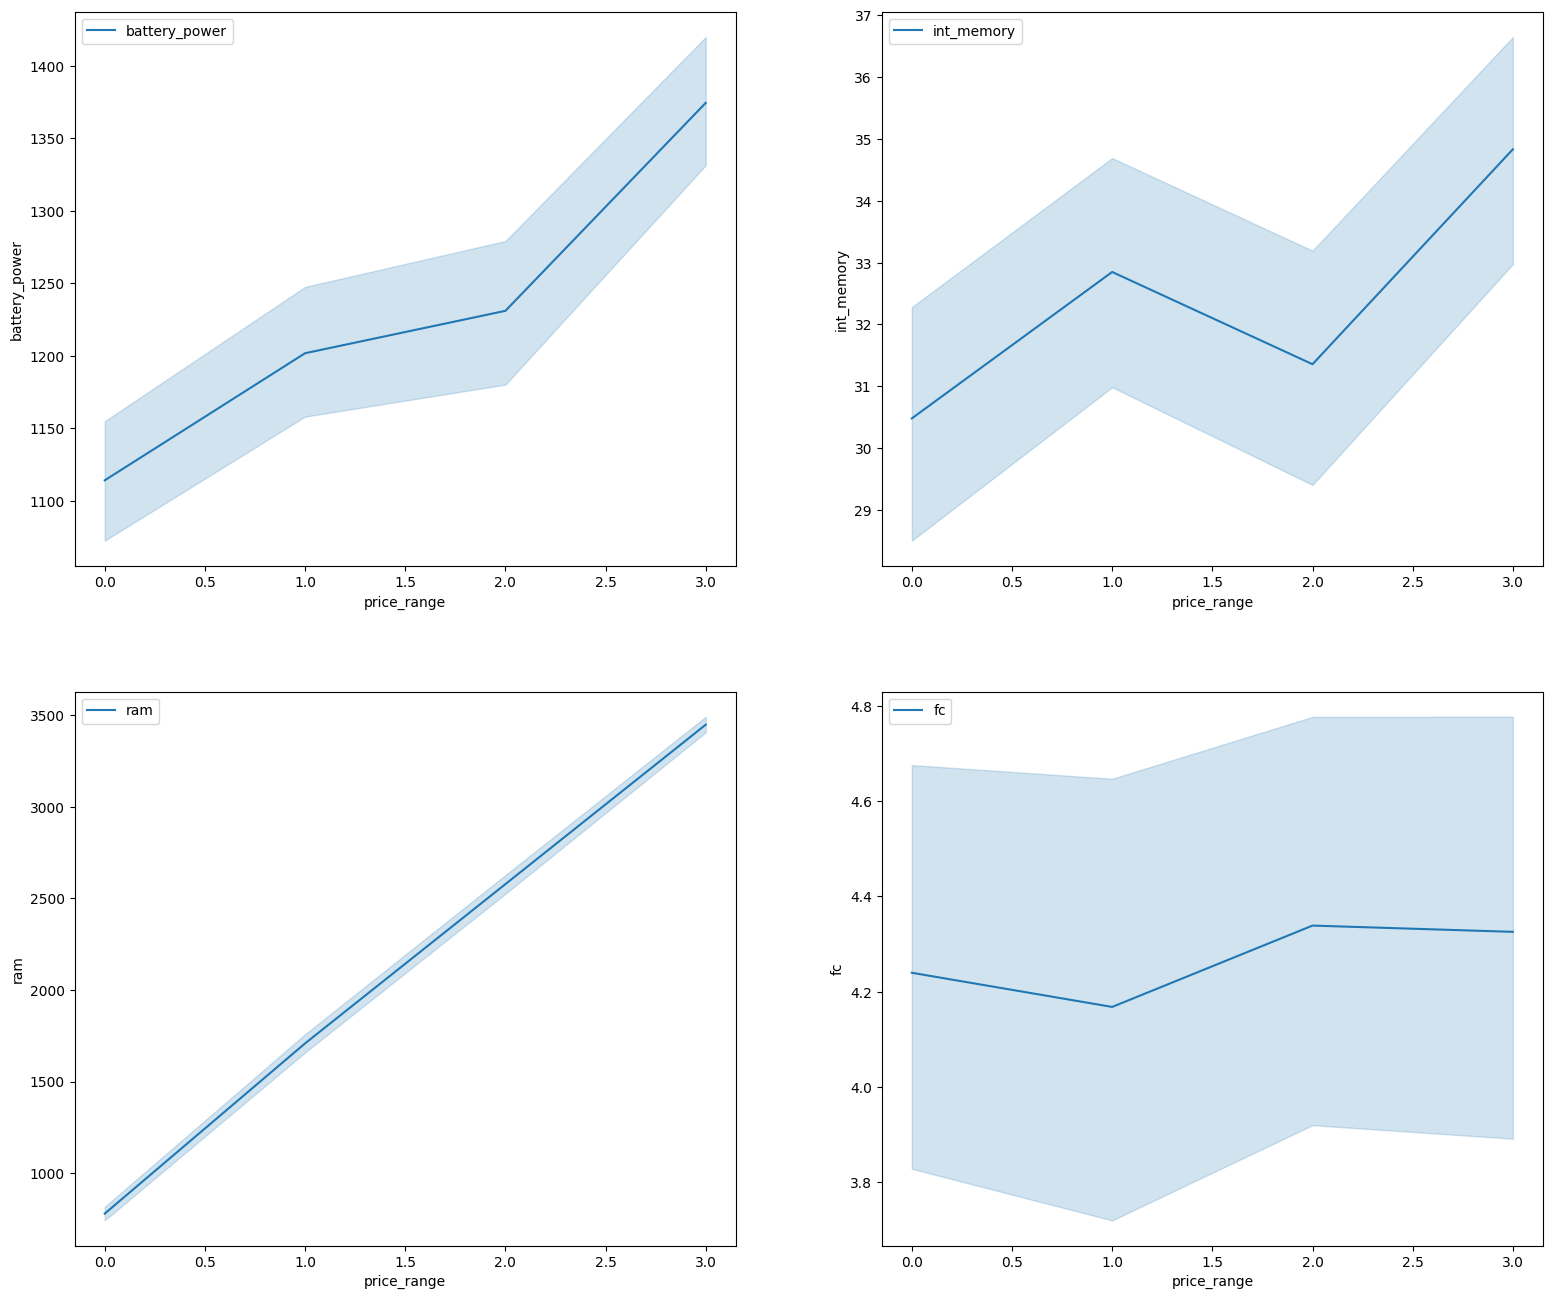

In [24]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.lineplot(df,x='price_range',y='battery_power', label='battery_power', ax=axs[0,0])

sns.lineplot(df,x='price_range',y='int_memory', label='int_memory',ax=axs[0,1])

sns.lineplot(df,x='price_range',y='ram', label='ram',ax=axs[1,0])

sns.lineplot(df,x='price_range',y='fc', label='fc',ax=axs[1,1])

# GRAPH1

<Axes: xlabel='price_range', ylabel='px_width'>

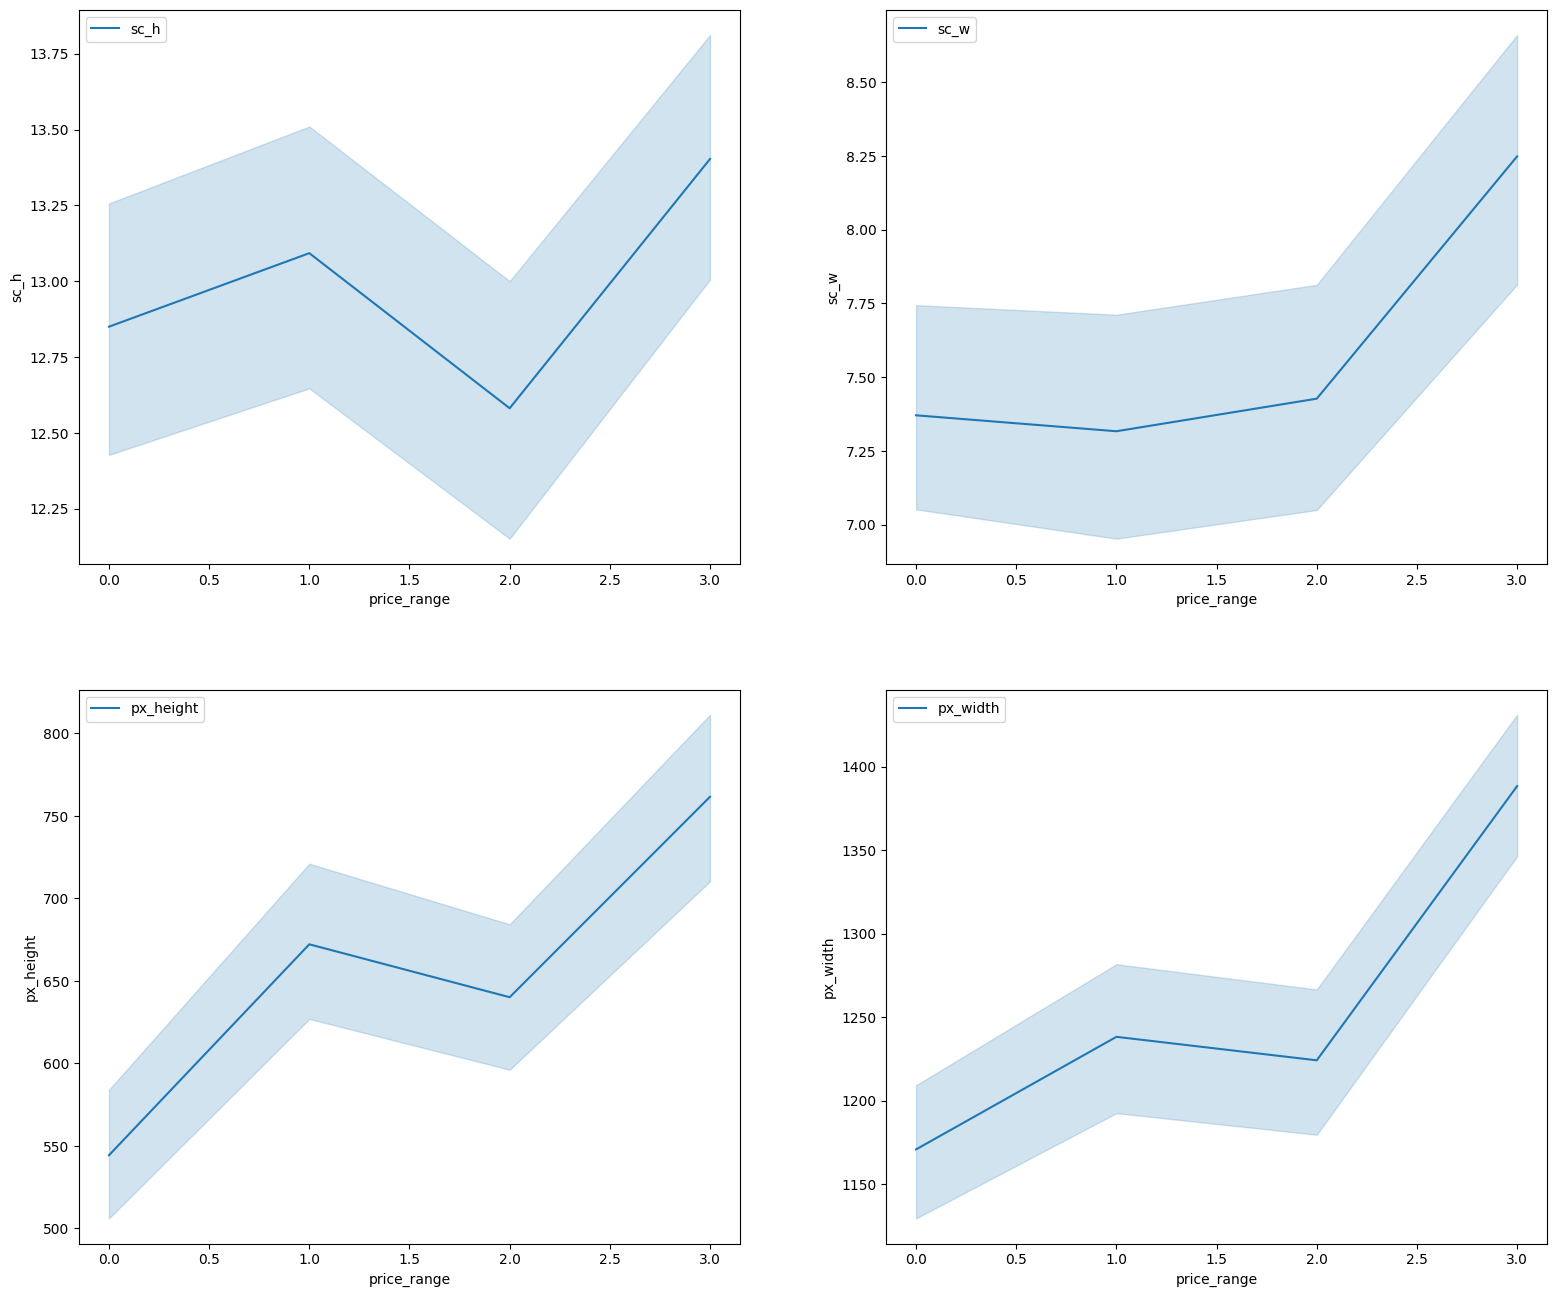

In [25]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.lineplot(df,x='price_range',y='sc_h', label='sc_h', ax=axs[0,0])

sns.lineplot(df,x='price_range',y='sc_w', label='sc_w',ax=axs[0,1])

sns.lineplot(df,x='price_range',y='px_height', label='px_height',ax=axs[1,0])

sns.lineplot(df,x='price_range',y='px_width', label='px_width',ax=axs[1,1])

#graph3


In [26]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
from bokeh.io import curdoc
import pandas as pd

In [27]:
source = ColumnDataSource(data=dict(
    x=df['n_cores'], 
    y=df['ram'],
    price=df['price_range'], 
    battery=df['battery_power']
))

p = figure(title="Зависимость цены от количества ядер и RAM",
           x_axis_label='Количество ядер',
           y_axis_label='Оперативная память (RAM)',
           tools="pan,wheel_zoom,box_zoom,reset")

p.circle('x', 'y', size=10, color="navy", alpha=0.5, source=source)

hover = HoverTool()
hover.tooltips = [("Цена", "@price"), ("RAM", "@y MB"), ("Батарея", "@battery")]
p.add_tools(hover)

show(p)

find_ffmpeg failed, using the integrated library.


[2881:2881:1117/142939.419113:ERROR:brand_package_util.cc(112)] Failed to verify partner_config signature, config will be ignored
[2881:2881:1117/142941.286497:ERROR:isolated_origin_util.cc(75)] Ignoring port number in isolated origin: chrome://custo
[2881:2881:1117/142941.293565:ERROR:child_process_security_policy_impl.cc(2309)] Invalid isolated origin: 
[2881:2881:1117/142942.273698:ERROR:chrome_browser_cloud_management_controller.cc(342)] Cloud management controller initialization aborted as CBCM is not enabled.


<Axes: xlabel='m_dep', ylabel='n_cores'>

[2881:2906:1117/142943.739084:ERROR:cprocsp_api.cc(847)] Failed to load library /opt/cprocsp/lib/amd64/libcapi20.so: /opt/cprocsp/lib/amd64/libcapi20.so: cannot open shared object file: No such file or directory
[2881:2907:1117/142943.996215:ERROR:command_storage_backend.cc(277)] Commands successfully read before error: 278, bytes successfully read from file before error: 222805


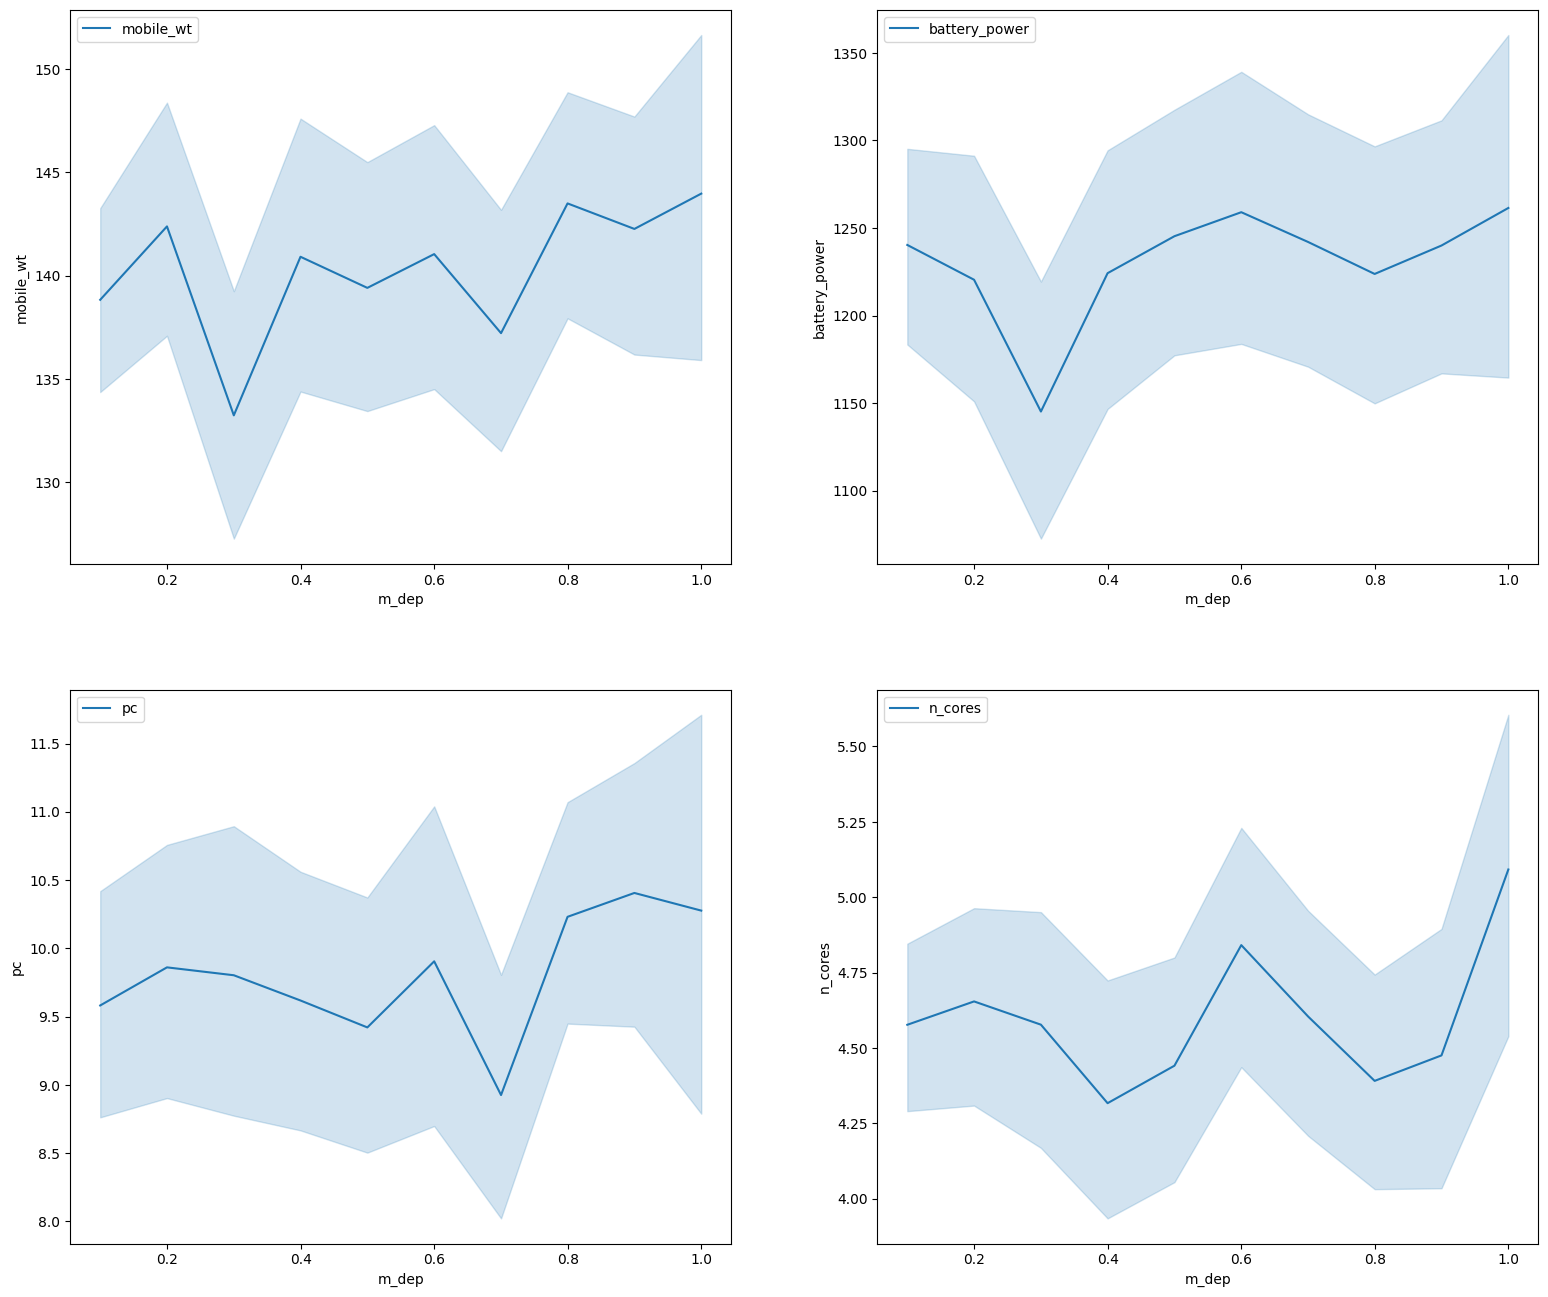

In [28]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.lineplot(df,x='m_dep',y='mobile_wt', label='mobile_wt', ax=axs[0,0])

sns.lineplot(df,x='m_dep',y='battery_power', label='battery_power',ax=axs[0,1])

sns.lineplot(df,x='m_dep',y='pc', label='pc',ax=axs[1,0])

sns.lineplot(df,x='m_dep',y='n_cores', label='n_cores',ax=axs[1,1])

#graph4

[2972:7:1117/142946.893807:ERROR:command_buffer_proxy_impl.cc(132)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
[2978:7:1117/142946.899786:ERROR:command_buffer_proxy_impl.cc(132)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.


<Axes: xlabel='touch_screen', ylabel='talk_time'>

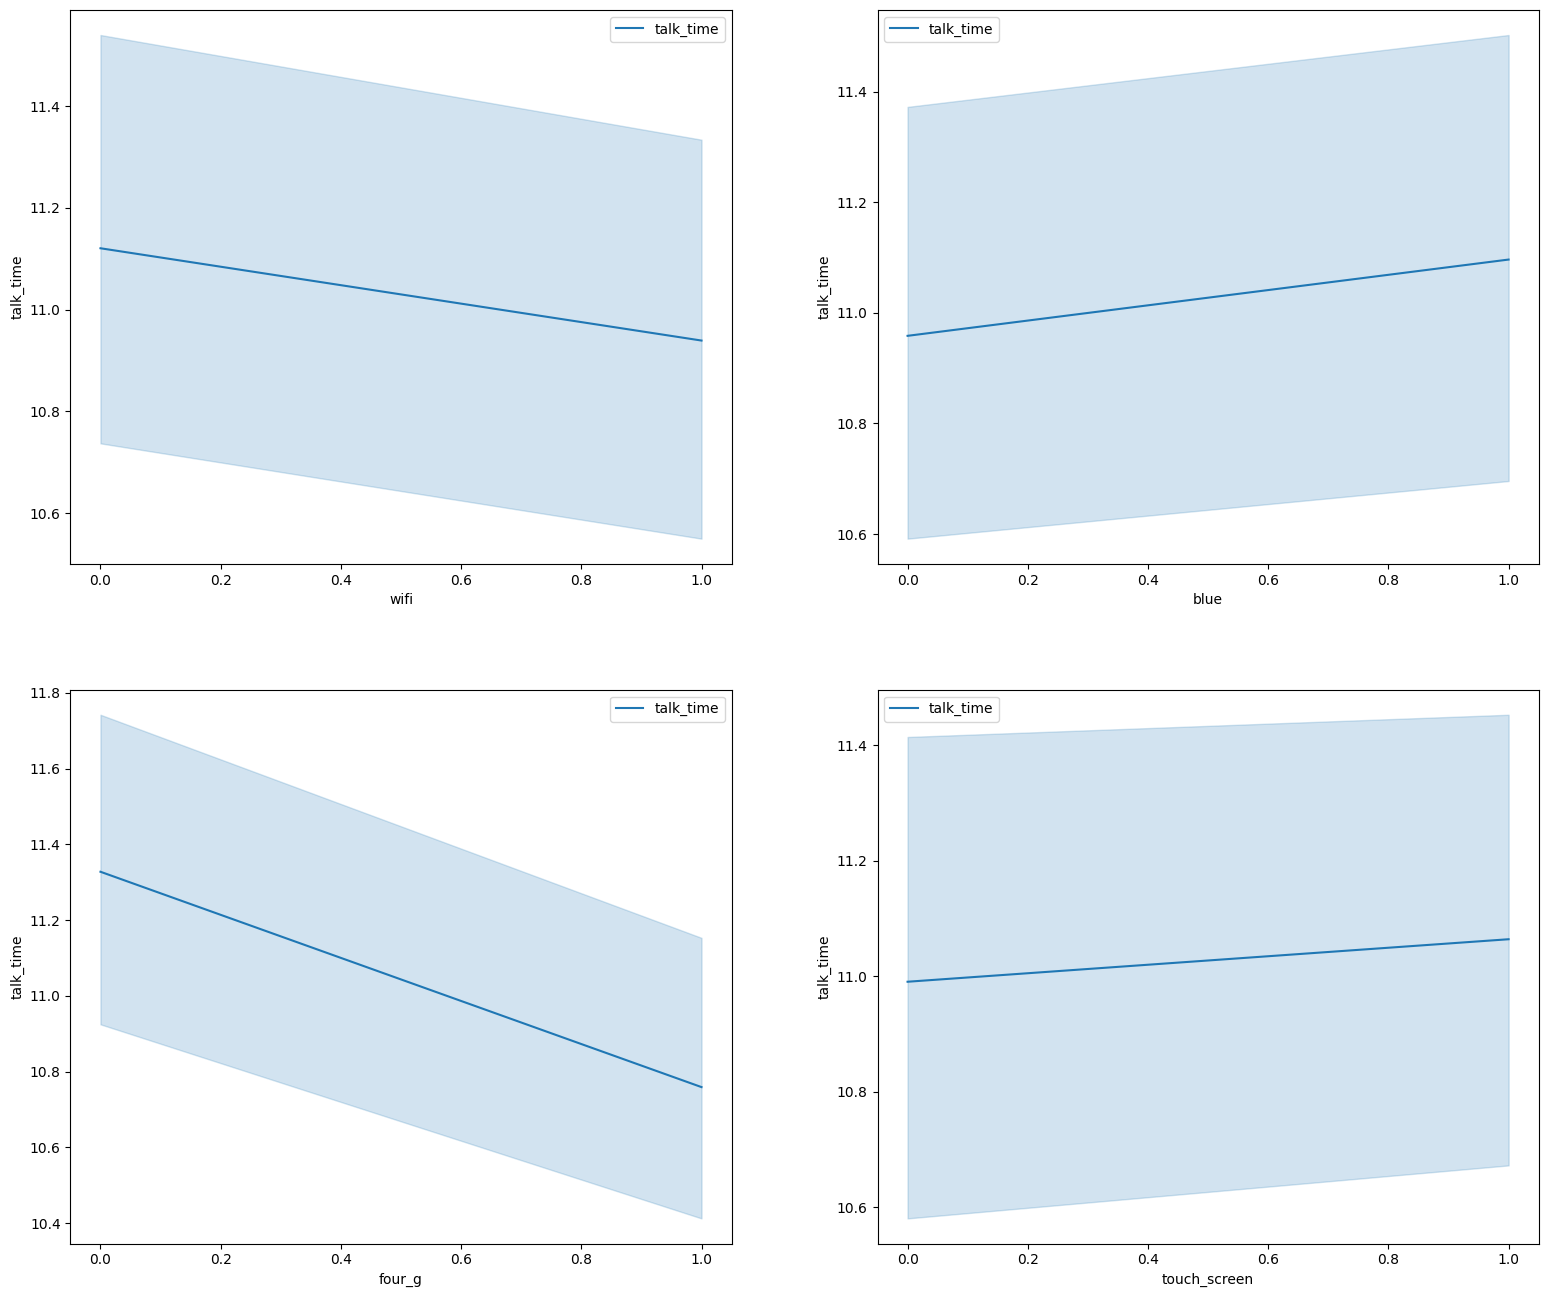

In [29]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.lineplot(df,x='wifi',y='talk_time', label='talk_time', ax=axs[0,0])

sns.lineplot(df,x='blue',y='talk_time', label='talk_time',ax=axs[0,1])

sns.lineplot(df,x='four_g',y='talk_time', label='talk_time',ax=axs[1,0])

sns.lineplot(df,x='touch_screen',y='talk_time', label='talk_time',ax=axs[1,1])

#graph2

In [30]:
df.to_pickle('../data/clean_data.pkl')

[2881:2919:1117/142950.658890:ERROR:upgrade_detector_impl.cc(544)] Unexpected product version output: find_ffmpeg failed, using the integrated library.
24.7.3.1234

[2881:2911:1117/142950.921403:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
[2881:2906:1117/142954.255362:ERROR:passman_store_impl.cc(1367)] No encryptor.
[2881:2911:1117/143011.481495:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
[2881:2911:1117/143111.249256:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
[2881:2911:1117/143256.277066:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
[2881:2911:1117/143545.683492:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
[2881:2911:1117/144304.876396:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
